# FashioNet ver.2

## Code

In [1]:
import os
import h5py
from PIL import Image
import operator

import matplotlib.pyplot as plt
import time, pickle, pandas

import numpy as np

import tensorflow.keras
from PIL import Image
import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D ,Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import Input
from keras.applications import VGG16
from keras import backend
from keras import optimizers
from tensorflow.keras import applications
from keras.utils.conv_utils import convert_kernel


%matplotlib inline

/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rtcl/Deep-fashion/D

In [2]:
import tensorflow as tf
config = tf.ConfigProto()

config.gpu_options.allow_growth = True

sess = tf.Session(config=config)

In [3]:
# Declaring the no of classes for the category
nb_classes = 5
class_name = {
    
    0: 'Checked',
    1: 'Floral',
    2: 'Graphic',
    3: 'Plain',
    4: 'Striped'
    
}

In [4]:
def show_sample(X, y, prediction=-1):
    im = X
    plt.imshow(im)
    if prediction >= 0:
        plt.title("Class = %s, Predict = %s" % (class_name[y], class_name[prediction]))
    else:
        plt.title("Class = %s" % (class_name[y]))

    plt.axis('on')
    plt.show()

In [5]:
img_width, img_height = 150, 150

train_data_dir = './Classification/pattern/train'
validation_data_dir = './Classification/pattern/val'

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255        
        )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=5,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=5,
        class_mode='categorical')

Found 7079 images belonging to 5 classes.
Found 1814 images belonging to 5 classes.


In [7]:
nb_train_samples = 7079
nb_validation_samples = 1814

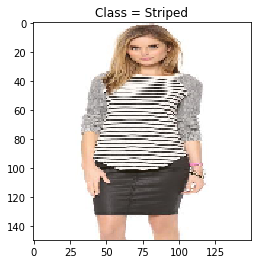

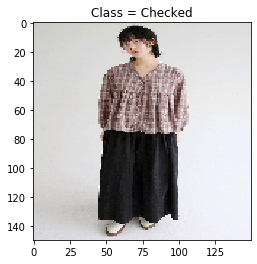

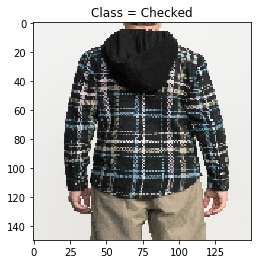

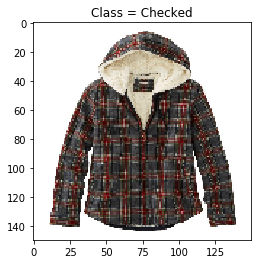

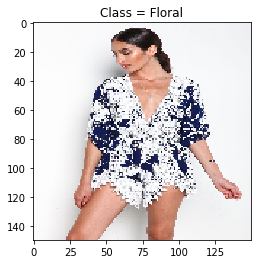

In [8]:
import PIL
from PIL import Image
from IPython.display import display


for X_batch, Y_batch in train_generator:
    for i in range(5):
        show_sample(X_batch[i, :, :, :], np.argmax(Y_batch[i]))
    break

In [9]:
def build_vgg16(framework='tf'):

    if framework == 'th':
         backend.set_image_dim_ordering('th')        
    else:
         backend.set_image_dim_ordering('tf')
        
    model = Sequential()
    if framework == 'th':
        model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))
    else:
        model.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height, 3)))
        
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    return model

weights_path = 'vgg16_weights.h5'
th_model = build_vgg16('th')

assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(th_model.layers):
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    
f.close()
print('Model loaded.')

tf_model = build_vgg16('tf')

for th_layer, tf_layer in zip(th_model.layers, tf_model.layers):
        tf_layer.set_weights(tf_layer.get_weights())
    
top_model = Sequential()
print (Flatten(input_shape=tf_model.output_shape[1:]))
top_model.add(Flatten(input_shape=tf_model.output_shape[1:]))
top_model.add(Dense(512, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(5, activation='softmax'))
print (tf_model.summary())
print(top_model.summary())

Instructions for updating:
Colocations handled automatically by placer.


/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_1")`
  
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_2")`
  app.launch_new_instance()
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_1")`
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_2")`
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `C

Model loaded.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 152, 152, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 150, 150, 64)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 152, 152, 64)      0         
_________________________________________________________________
conv1_2 (Conv2D)             (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 77, 77, 64)        0         
_____________

In [10]:
# add the model on top of the convolutional base
tf_model.add(top_model)

In [11]:
#Freezing the weights of all layers except top

for layer in tf_model.layers[:-4]:
    layer.trainable = False
    
#Using an Adam optimizer with lower learning rate
adam1=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
tf_model.compile(optimizer = adam1, loss = 'categorical_crossentropy', metrics=['accuracy'])


In [12]:
#Training the model for 5 epochs

checkpoint_callback = ModelCheckpoint('./models/vgg_weights_frozen_pattern.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 5,
        validation_data = validation_generator,
        nb_val_samples = nb_validation_samples,
        verbose = 1,
        initial_epoch = 0,
        callbacks=[checkpoint_callback]
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=1, initial_epoch=0, callbacks=[<keras.ca..., steps_per_epoch=1415, epochs=5, validation_steps=1814)`
  del sys.path[0]


 350/1415 [======>.......................] - ETA: 32s - loss: 1.6041 - acc: 0.2206

/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8552 bytes but only got 8356. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


1415/1415 [==============================] - 91s 65ms/step - loss: 1.5476 - acc: 0.2669 - val_loss: 1.4415 - val_acc: 0.3329
Epoch 2/5
1415/1415 [==============================] - 89s 63ms/step - loss: 1.4355 - acc: 0.3592 - val_loss: 1.3563 - val_acc: 0.4193
Epoch 3/5
1415/1415 [==============================] - 90s 63ms/step - loss: 1.3583 - acc: 0.4362 - val_loss: 1.2697 - val_acc: 0.5162
Epoch 4/5
1415/1415 [==============================] - 90s 64ms/step - loss: 1.2948 - acc: 0.4707 - val_loss: 1.2248 - val_acc: 0.5069
Epoch 5/5
1415/1415 [==============================] - 89s 63ms/step - loss: 1.2495 - acc: 0.4993 - val_loss: 1.2146 - val_acc: 0.5022


In [13]:
accuracies = np.array([])
losses = np.array([])

i=0
for X_batch, Y_batch in validation_generator:
    loss, accuracy = tf_model.evaluate(X_batch, Y_batch, verbose=0)
    losses = np.append(losses, loss)
    accuracies = np.append(accuracies, accuracy)
    i += 1
    if i == 20:
        break
       
print("Validation: accuracy = %f  ;  loss = %f" % (np.mean(accuracies), np.mean(losses)))

Validation: accuracy = 0.432500  ;  loss = 1.295063


In [14]:
#unfreezing the layers and recompiling the model 

for layer in tf_model.layers[:-4]:
    layer.trainable = True
    
#Using an Adam optimizer with lower learning rate
adam1=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
tf_model.compile(loss = 'categorical_crossentropy', optimizer = adam1, metrics=['accuracy'])

In [15]:
#Loading weights with the best validation accuracy
tf_model.load_weights('./models/vgg_weights_frozen_pattern.hdf5')

In [16]:
#Training the whole network for 5 epochs first
checkpoint_callback = ModelCheckpoint('./models/vgg_weights_best_pattern.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 10,
        validation_data = validation_generator,
        nb_val_samples = nb_validation_samples,
        verbose = 1,
        initial_epoch = 5,
        callbacks=[checkpoint_callback]
)

/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=1, initial_epoch=5, callbacks=[<keras.ca..., steps_per_epoch=1415, epochs=10, validation_steps=1814)`
  if sys.path[0] == '':


Epoch 6/10
1415/1415 [==============================] - 119s 84ms/step - loss: 1.2991 - acc: 0.4750 - val_loss: 1.1247 - val_acc: 0.5177
Epoch 7/10
1415/1415 [==============================] - 117s 83ms/step - loss: 0.9957 - acc: 0.6277 - val_loss: 0.8860 - val_acc: 0.6741
Epoch 8/10
1415/1415 [==============================] - 117s 83ms/step - loss: 0.8334 - acc: 0.7036 - val_loss: 0.7431 - val_acc: 0.7241
Epoch 9/10
1415/1415 [==============================] - 117s 83ms/step - loss: 0.7036 - acc: 0.7580 - val_loss: 0.6854 - val_acc: 0.7622
Epoch 10/10
1415/1415 [==============================] - 118s 83ms/step - loss: 0.6142 - acc: 0.7865 - val_loss: 0.6205 - val_acc: 0.7886


In [17]:
accuracies = np.array([])
losses = np.array([])

i=0
for X_batch, Y_batch in validation_generator:
    loss, accuracy = tf_model.evaluate(X_batch, Y_batch, verbose=0)
    losses = np.append(losses, loss)
    accuracies = np.append(accuracies, accuracy)
    i += 1
    if i == 20:
        break

print("Validation: accuracy = %f  ;  loss = %f" % (np.mean(accuracies), np.mean(losses)))

Validation: accuracy = 0.830000  ;  loss = 0.552523


In [18]:
tf_model.fit_generator(
        train_generator,
        samples_per_epoch = nb_train_samples,
        nb_epoch = 13,
        validation_steps = 4000,
        validation_data = validation_generator,
        verbose = 1,
        initial_epoch = 10,
        callbacks=[checkpoint_callback]
)

Epoch 11/13
   3/1415 [..............................] - ETA: 1:22 - loss: 0.5290 - acc: 0.9333

/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_steps=4000, validation_data=<keras_pre..., verbose=1, initial_epoch=10, callbacks=[<keras.ca..., steps_per_epoch=1415, epochs=13)`
  if __name__ == '__main__':


1415/1415 [==============================] - 178s 126ms/step - loss: 0.5246 - acc: 0.8257 - val_loss: 0.5741 - val_acc: 0.8224
Epoch 12/13
1415/1415 [==============================] - 178s 126ms/step - loss: 0.4647 - acc: 0.8469 - val_loss: 0.4900 - val_acc: 0.8370
Epoch 13/13
1415/1415 [==============================] - 179s 127ms/step - loss: 0.4221 - acc: 0.8594 - val_loss: 0.5194 - val_acc: 0.8432


Now the best model for pattern is saved in an hdf5 file. We do a similar run for all the categories of features and get models for each of those. 